# __Food Access Challenge for Members -- Data Analysis__
_Author(s): Wylliam Cheng_ \
_Date: 7/25/2025_

---

In [3]:
!pip install -r requirements.txt

## Libraries

In [332]:
import sqlite3
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib.colors import LogNorm
import scipy
import ast
from adjustText import adjust_text
import geopandas as gpd

## Installation of Map

In [1]:
!wget https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_20m.zip
!unzip cb_2021_us_county_20m.zip

--2025-08-01 10:24:25--  https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_20m.zip
2606:4700:78::90:0:181, 2606:4700:78::90:0:180, 2606:4700:78::90:0:183, ...
Connecting to www2.census.gov (www2.census.gov)|2606:4700:78::90:0:181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 914474 (893K) [application/zip]
Saving to: ‘cb_2021_us_county_20m.zip’

cb_2021_us_county_2 100%[===================>] 893.04K  5.26MB/s    in 0.2s    

2025-08-01 10:24:25 (5.26 MB/s) - ‘cb_2021_us_county_20m.zip’ saved [914474/914474]

Archive:  cb_2021_us_county_20m.zip
  inflating: cb_2021_us_county_20m.shp.ea.iso.xml  
  inflating: cb_2021_us_county_20m.shp.iso.xml  
  inflating: cb_2021_us_county_20m.shp  
  inflating: cb_2021_us_county_20m.shx  
  inflating: cb_2021_us_county_20m.dbf  
  inflating: cb_2021_us_county_20m.prj  
 extracting: cb_2021_us_county_20m.cpg  


---

## Data Exploration

In [333]:
## Connect Database
db_file = "challenge.db"
connection = sqlite3.connect(db_file)
cur = connection.cursor()

## Fetch table
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]    
print(f"Tables: {table_list}")

Tables: [('five_hundred_cities',), ('access',), ('variable_list',)]


In [334]:
## Load data into Pandas
cities = pd.read_sql_query("SELECT * FROM five_hundred_cities;", connection, index_col="index")
access = pd.read_sql_query("SELECT * FROM access;", connection, index_col="index")
variable_list = pd.read_sql_query("SELECT * FROM variable_list;", connection, index_col="index")

### Cities
* identifiers: ```Place_TractID```, ```TractFIPS```, ```PlaceFIPS```
* population count from 2016
* behavioral & health related data

In [335]:
cities.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
index,,,,,,,,,,,,,,,,,,,,,
0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,"(30.1, 32.2)",...,"(83.4, 86.6)",20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,"(29.3, 31.7)",...,"(81.9, 85.6)",22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,"(30.2, 32.9)",...,"(82.3, 86.8)",19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,"(33.5, 36.4)",...,"(82.1, 86.5)",21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,"(34.9, 37.7)",...,"(82.2, 87.1)",25.5,"(23.1, 28.0)",48.3,"(46.6, 49.7)",9.0,"( 8.1, 10.0)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)"


### Access
* identifiers: ```FIPS```, ```State```, ```County```
* food accessibility metrics, e.g. store access, etc.
  

In [336]:
access.head()

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
index,,,,,,,,,,,,,,,,,,,,,
0,1001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,6543.676824,...,471.136164,0.863345,86.767975,0.159000,61.169869,0.112092,8.817961,0.016159,482.848633,0.884808
1,1003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,...,1377.874834,0.755973,212.946378,0.116833,181.649648,0.099662,14.819634,0.008131,1127.696098,0.618712
2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,...,509.377525,1.855183,17.096410,0.062266,39.960527,0.145539,8.082376,0.029436,462.382655,1.684025
3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,...,8.596762,0.037516,1.994318,0.008703,2.513097,0.010967,0.000000,0.000000,5.259244,0.022951
4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,...,497.489891,0.867886,8.428994,0.014705,28.938242,0.050484,1.062851,0.001854,202.914187,0.353990


### Variable List

In [337]:
variable_list[variable_list["Category Name"] == "Access and Proximity to Grocery Store"].head()

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
index,,,,,,,
0,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2010",LACCESS_POP10,CNTY10,Count
1,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2015",LACCESS_POP15,CNTY10,Count
2,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (% change), 20...",PCH_LACCESS_POP_10_15,CNTY10,% change
3,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2010",PCT_LACCESS_POP10,CNTY10,Percent
4,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2015",PCT_LACCESS_POP15,CNTY10,Percent


In [338]:
lookup_table = variable_list[variable_list["Category Name"] == "Access and Proximity to Grocery Store"][["Variable Code", "Variable Name"]]
lookup_table

,Variable Code,Variable Name
index,,
0,LACCESS_POP10,"Population, low access to store, 2010"
1,LACCESS_POP15,"Population, low access to store, 2015"
2,PCH_LACCESS_POP_10_15,"Population, low access to store (% change), 20..."
3,PCT_LACCESS_POP10,"Population, low access to store (%), 2010"
4,PCT_LACCESS_POP15,"Population, low access to store (%), 2015"
5,LACCESS_LOWI10,"Low income & low access to store, 2010"
6,LACCESS_LOWI15,"Low income & low access to store, 2015"
7,PCH_LACCESS_LOWI_10_15,"Low income & low access to store (% change), 2..."
8,PCT_LACCESS_LOWI10,"Low income & low access to store (%), 2010"


#### Note
* Percentage change indicators &rarr; $\frac{(\textbf{year 2} - \textbf{year 1})}{\textbf{year 1}} \times 100$
  * Only accounting for 2010 & 2015 data points

---

## Exploration on Access Data

### Check Missing Values

In [339]:
print("Total number of county data:", len(access))
print("Number of county with missing data:", access.isnull().any(axis=1).sum())
print("NA Value Ratio =", f"{access.isnull().any(axis=1).sum()/len(access)*100:.2f}%")

Total number of county data: 3143
Number of county with missing data: 40
NA Value Ratio = 1.27%


### Top 10 Counties with Largest Low Access to Store Population

In [340]:
print("2010 County with Largest Low Access to Store Population:")
access.sort_values(by="LACCESS_POP10", ascending=False).head(10)

2010 County with Largest Low Access to Store Population:


,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
index,,,,,,,,,,,,,,,,,,,,,
2623,48201,TX,Harris,886068.668386,740267.412661,-16.454848,21.651253,18.088572,292541.789025,259479.516033,...,263440.500070,6.437218,40101.958015,0.979899,4714.186116,0.115192,690.306606,0.016868,113699.486121,2.778268
204,6037,CA,Los Angeles,613459.048964,622625.436181,1.494213,6.247925,6.341282,139368.943118,161790.521343,...,217460.415981,2.214779,76998.348562,0.784209,3943.964203,0.040168,1399.535435,0.014254,115781.021513,1.179200
2537,48029,TX,Bexar,537897.612201,451601.664033,-16.043192,31.368444,26.335944,198948.563146,182902.182573,...,254482.018349,14.840566,10811.318957,0.630481,3730.127166,0.217529,714.283699,0.041655,70677.052066,4.121656
2742,48439,TX,Tarrant,503753.083527,463702.839418,-7.950372,27.846524,25.632622,146037.473082,145321.899872,...,101046.514678,5.585661,23547.502310,1.301662,2856.724834,0.157914,938.799084,0.051895,51130.467347,2.826396
103,4013,AZ,Maricopa,492281.154146,511215.572448,3.846261,12.896674,13.392714,139988.257834,167933.017109,...,129063.827907,3.381186,14730.523043,0.385907,10079.040365,0.264049,724.064859,0.018969,73145.345007,1.916246
2579,48113,TX,Dallas,473273.182302,393661.068695,-16.821598,19.985025,16.623225,189190.308438,165055.778641,...,127580.076275,5.387356,19165.127790,0.809291,2620.725531,0.110666,220.717090,0.009320,60325.363758,2.547374
222,6073,CA,San Diego,456713.537412,424210.884923,-7.116639,14.755003,13.704943,84421.134866,95163.546058,...,74758.182123,2.415206,40484.619297,1.307933,3034.525144,0.098036,1751.033341,0.056570,45842.152590,1.481018
221,6071,CA,San Bernardino,454073.992421,433153.412546,-4.607306,22.310916,21.282984,151878.682800,162904.567271,...,170954.171763,8.399830,23250.213457,1.142399,5020.117741,0.246663,1580.323569,0.077649,94996.795648,4.667666
1879,36103,NY,Suffolk,453547.724578,380951.607555,-16.006280,30.371160,25.509868,62976.169009,58308.524326,...,43748.171640,2.929532,14770.842090,0.989108,1063.609224,0.071223,137.158374,0.009185,19893.435789,1.332135


In [341]:
print("2015 County with Largest Low Access to Store Population:")
access.sort_values(by="LACCESS_POP15", ascending=False).head(10)

2015 County with Largest Low Access to Store Population:


,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
index,,,,,,,,,,,,,,,,,,,,,
2623,48201,TX,Harris,886068.668386,740267.412661,-16.454848,21.651253,18.088572,292541.789025,259479.516033,...,263440.500070,6.437218,40101.958015,0.979899,4714.186116,0.115192,690.306606,0.016868,113699.486121,2.778268
204,6037,CA,Los Angeles,613459.048964,622625.436181,1.494213,6.247925,6.341282,139368.943118,161790.521343,...,217460.415981,2.214779,76998.348562,0.784209,3943.964203,0.040168,1399.535435,0.014254,115781.021513,1.179200
103,4013,AZ,Maricopa,492281.154146,511215.572448,3.846261,12.896674,13.392714,139988.257834,167933.017109,...,129063.827907,3.381186,14730.523043,0.385907,10079.040365,0.264049,724.064859,0.018969,73145.345007,1.916246
2742,48439,TX,Tarrant,503753.083527,463702.839418,-7.950372,27.846524,25.632622,146037.473082,145321.899872,...,101046.514678,5.585661,23547.502310,1.301662,2856.724834,0.157914,938.799084,0.051895,51130.467347,2.826396
2537,48029,TX,Bexar,537897.612201,451601.664033,-16.043192,31.368444,26.335944,198948.563146,182902.182573,...,254482.018349,14.840566,10811.318957,0.630481,3730.127166,0.217529,714.283699,0.041655,70677.052066,4.121656
218,6065,CA,Riverside,433980.994197,437849.237236,0.891339,19.819733,19.996394,135289.836542,149950.847540,...,187655.499170,8.570149,21116.344924,0.964375,4259.109773,0.194512,1183.716055,0.054060,102836.110547,4.696483
221,6071,CA,San Bernardino,454073.992421,433153.412546,-4.607306,22.310916,21.282984,151878.682800,162904.567271,...,170954.171763,8.399830,23250.213457,1.142399,5020.117741,0.246663,1580.323569,0.077649,94996.795648,4.667666
222,6073,CA,San Diego,456713.537412,424210.884923,-7.116639,14.755003,13.704943,84421.134866,95163.546058,...,74758.182123,2.415206,40484.619297,1.307933,3034.525144,0.098036,1751.033341,0.056570,45842.152590,1.481018
2579,48113,TX,Dallas,473273.182302,393661.068695,-16.821598,19.985025,16.623225,189190.308438,165055.778641,...,127580.076275,5.387356,19165.127790,0.809291,2620.725531,0.110666,220.717090,0.009320,60325.363758,2.547374


### Top 10 Counties with Highest Concentration of Low Access to Store Population

In [342]:
print("2010 County with Highest Concentration of Low Access to Store Population:")
access.sort_values(by="PCT_LACCESS_POP10", ascending=False).head(10)

2010 County with Highest Concentration of Low Access to Store Population:


,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
index,,,,,,,,,,,,,,,,,,,,,
1712,31117,NE,McPherson,539.000005,539.000005,0.000000e+00,100.000001,100.000001,136.427386,149.300471,...,2.000000,0.371058,0.0,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,1.484230
1656,31005,NE,Arthur,460.000004,460.000004,0.000000e+00,100.000001,100.000001,167.370893,202.941179,...,19.000001,4.130435,1.0,0.217391,2.000000,0.434783,0.0,0.000000,18.000001,3.913044
1657,31007,NE,Banner,690.000007,679.925867,-1.460020e+00,100.000001,98.539981,300.916669,307.564941,...,26.000000,3.768116,0.0,0.000000,3.000000,0.434783,0.0,0.000000,27.000000,3.913044
72,2068,AK,Denali,1826.000014,1826.000014,0.000000e+00,100.000001,100.000001,338.312491,418.769635,...,42.000000,2.300110,19.0,1.040526,65.000000,3.559693,1.0,0.054765,94.000000,5.147864
567,16033,ID,Clark,982.000006,982.000006,0.000000e+00,100.000001,100.000001,588.970834,641.939249,...,398.000002,40.529532,5.0,0.509165,10.000000,1.018330,0.0,0.000000,249.000005,25.356416
1796,35003,NM,Catron,3725.000021,3725.000021,2.685756e-13,100.000001,100.000001,1664.513780,1693.913842,...,709.000006,19.033557,7.0,0.187919,99.000001,2.657718,0.0,0.000000,259.000001,6.953020
2864,51091,VA,Highland,2321.000012,2321.000012,0.000000e+00,100.000000,100.000000,706.699549,738.362185,...,18.000000,0.775528,4.0,0.172340,5.000000,0.215424,0.0,0.000000,17.000000,0.732443
1632,30069,MT,Petroleum,494.000002,494.000002,0.000000e+00,100.000000,100.000000,235.356904,195.160494,...,5.000000,1.012146,0.0,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,1.214575
2738,48431,TX,Sterling,1143.000005,1143.000005,0.000000e+00,100.000000,100.000000,437.321740,540.137198,...,365.000002,31.933508,0.0,0.000000,23.000000,2.012248,0.0,0.000000,92.999999,8.136483


In [343]:
print("2015 County with Highest Concentration of Low Access to Store Population:")
access.sort_values(by="PCT_LACCESS_POP15", ascending=False).head(10)

2015 County with Highest Concentration of Low Access to Store Population:


,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
index,,,,,,,,,,,,,,,,,,,,,
1712,31117,NE,McPherson,539.000005,539.000005,0.000000e+00,100.000001,100.000001,136.427386,149.300471,...,2.000000,0.371058,0.0,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,1.484230
1656,31005,NE,Arthur,460.000004,460.000004,0.000000e+00,100.000001,100.000001,167.370893,202.941179,...,19.000001,4.130435,1.0,0.217391,2.000000,0.434783,0.0,0.000000,18.000001,3.913044
72,2068,AK,Denali,1826.000014,1826.000014,0.000000e+00,100.000001,100.000001,338.312491,418.769635,...,42.000000,2.300110,19.0,1.040526,65.000000,3.559693,1.0,0.054765,94.000000,5.147864
567,16033,ID,Clark,982.000006,982.000006,0.000000e+00,100.000001,100.000001,588.970834,641.939249,...,398.000002,40.529532,5.0,0.509165,10.000000,1.018330,0.0,0.000000,249.000005,25.356416
1796,35003,NM,Catron,3725.000021,3725.000021,2.685756e-13,100.000001,100.000001,1664.513780,1693.913842,...,709.000006,19.033557,7.0,0.187919,99.000001,2.657718,0.0,0.000000,259.000001,6.953020
2864,51091,VA,Highland,2321.000012,2321.000012,0.000000e+00,100.000000,100.000000,706.699549,738.362185,...,18.000000,0.775528,4.0,0.172340,5.000000,0.215424,0.0,0.000000,17.000000,0.732443
1632,30069,MT,Petroleum,494.000002,494.000002,0.000000e+00,100.000000,100.000000,235.356904,195.160494,...,5.000000,1.012146,0.0,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,1.214575
2738,48431,TX,Sterling,1143.000005,1143.000005,0.000000e+00,100.000000,100.000000,437.321740,540.137198,...,365.000002,31.933508,0.0,0.000000,23.000000,2.012248,0.0,0.000000,92.999999,8.136483
2600,48155,TX,Foard,1336.000005,1336.000005,0.000000e+00,100.000000,100.000000,708.099561,611.490654,...,187.000000,13.997006,5.0,0.374251,3.000000,0.224551,0.0,0.000000,64.000000,4.790419


### Top 10 Counties with Highest Increase of Low Access to Store Population (2010-2015)

In [344]:
print("County with Highest Increase of Low Access to Store Population 2010-2015:")
access.sort_values(by="PCH_LACCESS_POP_10_15", ascending=False).head(10)

County with Highest Increase of Low Access to Store Population 2010-2015:


,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
index,,,,,,,,,,,,,,,,,,,,,
672,17155,IL,Putnam,0.002970,655.860707,2.208376e+07,0.000049,10.920092,0.000589,131.659125,...,13.967849,0.232565,2.000000,0.033300,0.000000,0.000000,0.000000,0.000000,9.000000,0.149850
1989,37199,NC,Yancey,0.095502,189.764443,1.986019e+05,0.000536,1.065015,0.026877,85.176726,...,2.726708,0.015303,0.159504,0.000895,1.071349,0.006013,0.000000,0.000000,3.031428,0.017013
94,2282,AK,Yakutat,2.522153,662.000001,2.614742e+04,0.380990,100.000000,0.589698,167.845668,...,17.000000,2.567976,27.000000,4.078550,236.999998,35.800604,12.000000,1.812689,102.999999,15.558912
1236,26011,MI,Arenac,30.111951,4582.233906,1.511733e+04,0.189395,28.820894,12.948309,1945.654934,...,49.924355,0.314009,11.115101,0.069911,39.054659,0.245642,3.000000,0.018869,65.516980,0.412082
2933,51678,VA,Lexington,9.073506,434.150033,4.684810e+03,0.128848,6.165152,5.673913,83.190058,...,9.937124,0.141112,5.216520,0.074077,0.000000,0.000000,0.000000,0.000000,10.614677,0.150734
416,13061,GA,Clay,50.277846,2355.454017,4.584875e+03,1.579574,74.001069,33.815906,1801.625517,...,12.000000,0.377003,4.000000,0.125668,8.000000,0.251335,1.000000,0.031417,29.995736,0.942373
530,13291,GA,Union,7.359057,296.711254,3.931919e+03,0.034459,1.389358,2.700571,113.843171,...,4.606186,0.021569,0.264730,0.001240,0.401546,0.001880,0.000000,0.000000,5.535703,0.025921
539,13309,GA,Wheeler,11.998155,366.362583,2.953491e+03,0.161678,4.936836,3.859056,186.788476,...,6.928056,0.093357,5.832268,0.078591,0.000000,0.000000,0.018621,0.000251,6.914805,0.093179
3029,54073,WV,Pleasants,20.543356,542.264451,2.539610e+03,0.270130,7.130368,6.241019,247.931488,...,4.522407,0.059466,1.000000,0.013149,3.791476,0.049855,0.000000,0.000000,11.627088,0.152887


In [345]:
access.sort_values(by="PCH_LACCESS_POP_10_15", ascending=False).head(10).sort_values(by="LACCESS_POP10", ascending=False)

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
index,,,,,,,,,,,,,,,,,,,,,
416,13061,GA,Clay,50.277846,2355.454017,4.584875e+03,1.579574,74.001069,33.815906,1801.625517,...,12.000000,0.377003,4.000000,0.125668,8.000000,0.251335,1.000000,0.031417,29.995736,0.942373
1236,26011,MI,Arenac,30.111951,4582.233906,1.511733e+04,0.189395,28.820894,12.948309,1945.654934,...,49.924355,0.314009,11.115101,0.069911,39.054659,0.245642,3.000000,0.018869,65.516980,0.412082
3029,54073,WV,Pleasants,20.543356,542.264451,2.539610e+03,0.270130,7.130368,6.241019,247.931488,...,4.522407,0.059466,1.000000,0.013149,3.791476,0.049855,0.000000,0.000000,11.627088,0.152887
539,13309,GA,Wheeler,11.998155,366.362583,2.953491e+03,0.161678,4.936836,3.859056,186.788476,...,6.928056,0.093357,5.832268,0.078591,0.000000,0.000000,0.018621,0.000251,6.914805,0.093179
2933,51678,VA,Lexington,9.073506,434.150033,4.684810e+03,0.128848,6.165152,5.673913,83.190058,...,9.937124,0.141112,5.216520,0.074077,0.000000,0.000000,0.000000,0.000000,10.614677,0.150734
530,13291,GA,Union,7.359057,296.711254,3.931919e+03,0.034459,1.389358,2.700571,113.843171,...,4.606186,0.021569,0.264730,0.001240,0.401546,0.001880,0.000000,0.000000,5.535703,0.025921
1298,26135,MI,Oscoda,6.212204,138.393564,2.127769e+03,0.071901,1.601777,2.762522,63.236254,...,0.232934,0.002696,0.000000,0.000000,0.465868,0.005392,0.000000,0.000000,2.256640,0.026119
94,2282,AK,Yakutat,2.522153,662.000001,2.614742e+04,0.380990,100.000000,0.589698,167.845668,...,17.000000,2.567976,27.000000,4.078550,236.999998,35.800604,12.000000,1.812689,102.999999,15.558912
1989,37199,NC,Yancey,0.095502,189.764443,1.986019e+05,0.000536,1.065015,0.026877,85.176726,...,2.726708,0.015303,0.159504,0.000895,1.071349,0.006013,0.000000,0.000000,3.031428,0.017013


### Ranked low access to store population by State

In [346]:
state_summary = access.groupby("State")["LACCESS_POP10"].sum().reset_index()
state_summary = state_summary.sort_values("LACCESS_POP10", ascending=False)
state_summary["Rank"] = state_summary["LACCESS_POP10"].rank(method='min', ascending=False).astype(int)
state_summary = state_summary[["Rank", "State", "LACCESS_POP10"]]

print("2010 States with Highest Low Access to Store Population:")
state_summary.head(10)

2010 States with Highest Low Access to Store Population:


,Rank,State,LACCESS_POP10
43,1,TX,6.410726e+06
4,2,CA,4.594848e+06
9,3,FL,4.194767e+06
38,4,PA,2.647804e+06
35,5,OH,2.598512e+06
10,6,GA,2.449439e+06
34,7,NY,2.434773e+06
14,8,IL,2.430237e+06
31,9,NJ,2.210130e+06
22,10,MI,2.107829e+06


In [347]:
state_summary = access.groupby("State")["LACCESS_POP15"].sum().reset_index()
state_summary = state_summary.sort_values("LACCESS_POP15", ascending=False)
state_summary["Rank"] = state_summary["LACCESS_POP15"].rank(method='min', ascending=False).astype(int)
state_summary = state_summary[["Rank", "State", "LACCESS_POP15"]]

print("2015 States with Highest Low Access to Store Population:")
state_summary.head(10)

2015 States with Highest Low Access to Store Population:


,Rank,State,LACCESS_POP15
43,1,TX,5.726930e+06
4,2,CA,4.323350e+06
9,3,FL,3.986500e+06
35,4,OH,2.636742e+06
38,5,PA,2.526792e+06
10,6,GA,2.382761e+06
14,7,IL,2.295067e+06
34,8,NY,2.157895e+06
22,9,MI,2.083846e+06
31,10,NJ,1.990449e+06


---

## Exploration on Cities Data

In [348]:
print("Total number of tract data:", len(cities))
print("Number of tract with missing data:", cities.isnull().any(axis=1).sum())
print("NA Value Ratio =", f"{cities.isnull().any(axis=1).sum()/len(cities)*100:.2f}%")

Total number of tract data: 27210
Number of tract with missing data: 2344
NA Value Ratio = 8.61%


In [349]:
cities_copy = cities.copy()
cities_copy["FIPS"] = cities_copy["TractFIPS"].astype(str).str[:-6]
print("Number of County included in CDC data:", len(cities_copy["FIPS"].unique()))

Number of County included in CDC data: 326


### Aggregation based on County

In [350]:
## Compute Estimate & Standard Error

crude_prev_col = [column for column in cities_copy.columns if "CrudePrev" in column]
crude95CI_col = [column for column in cities_copy.columns if "_Crude95CI" in column]

new_col = [title.split("_")[0] + "_estimate" for title in crude_prev_col]

for prev, ci in zip(crude_prev_col, crude95CI_col):
    name = prev.split("_")[0] + "_estimate"
    
    cities_copy[name] = cities_copy[prev] * cities_copy["Population2010"] / 100
    
    cities_copy[ci] = cities_copy[ci].astype(str).str.replace(" ", "").str.strip()
    low = cities_copy[ci].str.extract(r"\(([^,]+),")[0].astype(float)
    high = cities_copy[ci].str.extract(r",([^)]+)\)")[0].astype(float)
    cities_copy[name + "SE"] = (high - low) / (2 * 1.96)
    
    cities_copy[name + "WeightedVariance"] = (cities_copy["Population2010"] ** 2) * (cities_copy[name + "SE"] ** 2)

cities_copy

/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_21334/3997886517.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cities_copy[name + "WeightedVariance"] = (cities_copy["Population2010"] ** 2) * (cities_copy[name + "SE"] ** 2)
/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_21334/3997886517.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cities_copy[name] = cities_copy[prev] * cities_copy["Population2010"] / 100
/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_21334/3997886517.py:16: Perfo

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,PHLTH_estimateWeightedVariance,SLEEP_estimate,SLEEP_estimateSE,SLEEP_estimateWeightedVariance,STROKE_estimate,STROKE_estimateSE,STROKE_estimateWeightedVariance,TEETHLOST_estimate,TEETHLOST_estimateSE,TEETHLOST_estimateWeightedVariance
index,,,,,,,,,,,,,,,,,,,,,
0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2,27.8)",31.2,"(30.1,32.2)",...,6.558042e+06,1384.110,0.561224,2.914685e+06,167.310,0.229592,4.877882e+05,879.138,2.908163,7.826291e+07
1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1,33.7)",30.5,"(29.3,31.7)",...,6.308811e+06,1217.075,0.637755,3.042444e+06,166.835,0.331633,8.226768e+05,899.815,3.750000,1.051907e+08
2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1,28.5)",31.5,"(30.2,32.9)",...,1.102884e+07,1525.466,0.714286,5.684818e+06,186.928,0.306122,1.044150e+06,954.668,3.341837,1.244352e+08
3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6,29.0)",35.0,"(33.5,36.4)",...,9.416131e+06,1320.304,0.739796,4.489210e+06,209.072,0.433673,1.542665e+06,973.760,4.719388,1.826911e+08
4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5,33.8)",36.3,"(34.9,37.7)",...,1.037645e+07,1244.691,0.790816,4.153174e+06,231.930,0.484694,1.560141e+06,1113.264,5.102041,1.728688e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,WY,Cheyenne,5613900,56021001000,5613900-56021001000,3026,17.2,"(14.9,19.9)",24.2,"(23.1,25.3)",...,3.152255e+06,1043.970,0.714286,4.671773e+06,90.780,0.127551,1.489724e+05,490.212,2.576531,6.078669e+07
27206,WY,Cheyenne,5613900,56021001200,5613900-56021001200,4638,9.8,"(7.8,12.0)",25.2,"(23.7,26.8)",...,8.749221e+06,1345.020,0.816327,1.433472e+07,115.950,0.153061,5.039551e+05,375.678,1.913265,7.874299e+07
27207,WY,Cheyenne,5613900,56021001501,5613900-56021001501,3312,14.5,"(12.9,16.1)",22.0,"(21.2,22.8)",...,1.606168e+06,1089.648,0.510204,2.855410e+06,76.176,0.076531,6.424673e+04,394.128,1.887755,3.909057e+07


In [351]:
## Aggregate by County

agg_dict = {'Population2010': 'sum'}
agg_dict.update({col: 'sum' for col in new_col})
agg_dict.update({col + "WeightedVariance": 'sum' for col in new_col})

aggr_cities = cities_copy.groupby("FIPS").agg(agg_dict).reset_index()
aggr_cities

,FIPS,Population2010,ACCESS2_estimate,ARTHRITIS_estimate,BINGE_estimate,BPHIGH_estimate,BPMED_estimate,CANCER_estimate,CASTHMA_estimate,CHD_estimate,...,KIDNEY_estimateWeightedVariance,LPA_estimateWeightedVariance,MAMMOUSE_estimateWeightedVariance,MHLTH_estimateWeightedVariance,OBESITY_estimateWeightedVariance,PAPTEST_estimateWeightedVariance,PHLTH_estimateWeightedVariance,SLEEP_estimateWeightedVariance,STROKE_estimateWeightedVariance,TEETHLOST_estimateWeightedVariance
0,10003,70851,13799.012,16692.714,10642.292,28468.115,51899.646,4004.102,8586.653,4517.539,...,3.438852e+06,4.433696e+08,3.632924e+08,1.389110e+08,1.145323e+08,2.676599e+08,1.353309e+08,1.376408e+08,1.313516e+07,2.766585e+09
1,1073,268987,50490.348,77180.306,33127.450,113686.517,206794.869,15848.910,31379.760,18324.836,...,1.637301e+07,1.893712e+09,1.594612e+09,5.917314e+08,4.629712e+08,1.075547e+09,6.311694e+08,5.456724e+08,6.668871e+07,9.271484e+09
2,1083,1521,215.244,316.608,263.547,471.543,1026.456,67.662,159.459,53.274,...,5.229305e+03,1.967756e+06,2.800419e+06,6.543644e+05,6.372109e+05,1.321781e+06,4.020089e+05,8.044482e+05,1.385458e+04,7.160882e+06
3,1089,178484,28737.557,51829.497,23529.869,67082.478,133061.392,12063.228,19453.168,12043.879,...,8.376847e+06,1.442729e+09,1.603245e+09,4.644714e+08,4.774354e+08,1.138224e+09,4.452889e+08,5.411369e+08,3.076530e+07,5.286297e+09
4,1097,195045,35656.392,59120.132,26290.915,82774.889,152078.757,12615.315,22635.775,14922.442,...,9.418930e+06,1.179569e+09,1.039055e+09,3.602905e+08,2.812835e+08,7.024450e+08,3.857028e+08,3.241160e+08,3.760668e+07,6.114678e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,8101,106585,21615.037,29125.245,15570.334,33659.866,75626.199,7199.996,10274.482,7287.784,...,4.633250e+06,4.208584e+08,9.066888e+08,1.196237e+08,1.133007e+08,4.594417e+08,1.598444e+08,1.338995e+08,1.461248e+07,2.710406e+09
322,8123,92802,16569.374,18504.639,15641.213,24275.199,58853.939,4997.880,8949.330,4503.226,...,3.138519e+06,4.836911e+08,1.085008e+09,2.082303e+08,1.449171e+08,7.253153e+08,1.341506e+08,1.571439e+08,7.923014e+06,2.619705e+09
323,9001,433368,64046.973,85964.892,73399.996,117641.978,309611.975,25465.017,43194.024,21225.821,...,1.420446e+07,2.137642e+09,2.598305e+09,6.168646e+08,4.840398e+08,0.000000e+00,5.860530e+08,8.457166e+08,4.541985e+07,8.098200e+09
324,9003,197981,38155.621,43020.762,26388.844,65136.842,140653.284,9879.062,22908.373,11736.615,...,7.566746e+06,9.860742e+08,8.265854e+08,3.657681e+08,2.166515e+08,0.000000e+00,3.016376e+08,2.989698e+08,2.329490e+07,5.473115e+09


In [352]:
## Compute aggregated prevalence & confidence interval

cols = [col.split("_")[0] for col in new_col]

for col in cols:
    aggr_cities[col + "_CrudePrev"] = aggr_cities[col + "_estimate"] / aggr_cities["Population2010"] * 100
    aggr_cities[col + "_SETotal"] = (
            aggr_cities[col + "_estimateWeightedVariance"] / (aggr_cities["Population2010"] ** 2)
        ) ** 0.5 * 100

    aggr_cities[col + "CI_Lower"] = aggr_cities[col + "_CrudePrev"] - 1.96 * aggr_cities[col + "_SETotal"]
    aggr_cities[col + "CI_High"] = aggr_cities[col + "_CrudePrev"] + 1.96 * aggr_cities[col + "_SETotal"]

aggr_cities

/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_21334/553601320.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aggr_cities[col + "_SETotal"] = (
/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_21334/553601320.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aggr_cities[col + "CI_Lower"] = aggr_cities[col + "_CrudePrev"] - 1.96 * aggr_cities[col + "_SETotal"]
/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_21334/553601320.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is

,FIPS,Population2010,ACCESS2_estimate,ARTHRITIS_estimate,BINGE_estimate,BPHIGH_estimate,BPMED_estimate,CANCER_estimate,CASTHMA_estimate,CHD_estimate,...,SLEEPCI_Lower,SLEEPCI_High,STROKE_CrudePrev,STROKE_SETotal,STROKECI_Lower,STROKECI_High,TEETHLOST_CrudePrev,TEETHLOST_SETotal,TEETHLOSTCI_Lower,TEETHLOSTCI_High
0,10003,70851,13799.012,16692.714,10642.292,28468.115,51899.646,4004.102,8586.653,4517.539,...,11.103340,76.013646,4.405495,5.115308,-5.620509,14.431498,24.631438,74.237962,-120.874967,170.137843
1,1073,268987,50490.348,77180.306,33127.450,113686.517,206794.869,15848.910,31379.760,18324.836,...,22.764418,56.806864,4.578558,3.035952,-1.371908,10.529023,20.028008,35.796727,-50.133577,90.189594
2,1083,1521,215.244,316.608,263.547,471.543,1026.456,67.662,159.459,53.274,...,-75.942888,155.213499,2.078304,7.738692,-13.089532,17.246139,10.956607,175.935729,-333.877422,355.790637
3,1089,178484,28737.557,51829.497,23529.869,67082.478,133061.392,12063.228,19453.168,12043.879,...,12.345747,63.436269,3.620226,3.107644,-2.470756,9.711208,15.915587,40.735821,-63.926621,95.757796
4,1097,195045,35656.392,59120.132,26290.915,82774.889,152078.757,12615.315,22635.775,14922.442,...,21.289992,57.472733,4.444517,3.144110,-1.717938,10.606972,20.430541,40.091469,-58.148738,99.009820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,8101,106585,21615.037,29125.245,15570.334,33659.866,75626.199,7199.996,10274.482,7287.784,...,12.964808,55.522630,3.643796,3.586459,-3.385663,10.673255,18.240015,48.845108,-77.496397,113.976427
322,8123,92802,16569.374,18504.639,15641.213,24275.199,58853.939,4997.880,8949.330,4503.226,...,2.771374,55.722780,2.581157,3.033108,-3.363735,8.526048,15.161916,55.152965,-92.937895,123.261726
323,9001,433368,64046.973,85964.892,73399.996,117641.978,309611.975,25465.017,43194.024,21225.821,...,23.699028,50.004231,2.765737,1.555128,-0.282313,5.813787,11.252951,20.765262,-29.446963,51.952864
324,9003,197981,38155.621,43020.762,26388.844,65136.842,140653.284,9879.062,22908.373,11736.615,...,22.437751,56.673214,3.544485,2.437850,-1.233700,8.322670,19.297730,37.367475,-53.942522,92.537981


In [353]:
## Cleaning Unused Columns
estimate_col = [col + "_estimate" for col in cols]
se_col = [col + "_SETotal" for col in cols]
weightedvar_col = [col + "_estimateWeightedVariance" for col in cols]
aggr_cities.drop(columns=estimate_col + se_col + weightedvar_col, inplace=True)
aggr_cities

,FIPS,Population2010,ACCESS2_CrudePrev,ACCESS2CI_Lower,ACCESS2CI_High,ARTHRITIS_CrudePrev,ARTHRITISCI_Lower,ARTHRITISCI_High,BINGE_CrudePrev,BINGECI_Lower,...,PHLTHCI_High,SLEEP_CrudePrev,SLEEPCI_Lower,SLEEPCI_High,STROKE_CrudePrev,STROKECI_Lower,STROKECI_High,TEETHLOST_CrudePrev,TEETHLOSTCI_Lower,TEETHLOSTCI_High
0,10003,70851,19.476101,-40.978255,79.930456,23.560308,0.148656,46.971961,15.020666,2.843029,...,48.294675,43.558493,11.103340,76.013646,4.405495,-5.620509,14.431498,24.631438,-120.874967,170.137843
1,1073,268987,18.770553,-15.609057,53.150164,28.692950,14.559304,42.826597,12.315632,6.212678,...,34.189670,39.785641,22.764418,56.806864,4.578558,-1.371908,10.529023,20.028008,-50.133577,90.189594
2,1083,1521,14.151479,-150.016607,178.319566,20.815779,-49.403782,91.035340,17.327219,-32.331839,...,92.190645,39.635306,-75.942888,155.213499,2.078304,-13.089532,17.246139,10.956607,-333.877422,355.790637
3,1089,178484,16.100915,-25.437269,57.639099,29.038736,8.229917,49.847554,13.183181,3.764566,...,37.731327,37.891008,12.345747,63.436269,3.620226,-2.470756,9.711208,15.915587,-63.926621,95.757796
4,1097,195045,18.281111,-18.004844,54.567065,30.311022,14.649172,45.972871,13.479410,6.422746,...,35.841031,39.381363,21.289992,57.472733,4.444517,-1.717938,10.606972,20.430541,-58.148738,99.009820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,8101,106585,20.279624,-28.537151,69.096398,27.325839,8.091706,46.559971,14.608373,4.980644,...,38.205286,34.243719,12.964808,55.522630,3.643796,-3.385663,10.673255,18.240015,-77.496397,113.976427
322,8123,92802,17.854544,-42.717669,78.426757,19.939914,0.119189,39.760639,16.854392,1.821763,...,35.953618,29.247077,2.771374,55.722780,2.581157,-3.363735,8.526048,15.161916,-92.937895,123.261726
323,9001,433368,14.778888,-9.349792,38.907569,19.836465,10.070917,29.602013,16.937106,11.652042,...,21.679735,36.851629,23.699028,50.004231,2.765737,-0.282313,5.813787,11.252951,-29.446963,51.952864
324,9003,197981,19.272365,-19.241812,57.786542,21.729743,9.566666,33.892819,13.328978,5.760593,...,31.423058,39.555483,22.437751,56.673214,3.544485,-1.233700,8.322670,19.297730,-53.942522,92.537981


---

## Metrics Building

We are going to build 3 metrics:
1. Access score
2. Disability score
3. Combined score

### Define weights


In [354]:
crudeprev = [col for col in cities.columns if "CrudePrev" in col]
crudeprev.remove("COLON_SCREEN_CrudePrev")
crudeprev.append("COLON_CrudePrev")
## [nutrition related disease] high (0.6): obesity, diabetes, highchol, bphigh
## [health conditions] medium (0.3): phlth, mhlth, kidney, copd, chd, asthma, cancer, arthritis
## [behavior / daily life] low (0.1): teethlost, sleep, paptest, mammouse, lpa, dental, csmoking, corew, corem, colon_screen, cholscreen, checkup, bpmed, binge, access2


high_disability_vars = ['OBESITY_CrudePrev', 'DIABETES_CrudePrev', 'HIGHCHOL_CrudePrev', 'BPHIGH_CrudePrev']
medium_disability_vars = ['PHLTH_CrudePrev', 'MHLTH_CrudePrev', 'KIDNEY_CrudePrev', 'COPD_CrudePrev', 'CHD_CrudePrev', 'CASTHMA_CrudePrev', 'CANCER_CrudePrev', 'ARTHRITIS_CrudePrev']
low_disability_vars = ['TEETHLOST_CrudePrev', 'SLEEP_CrudePrev', 'PAPTEST_CrudePrev', 'MAMMOUSE_CrudePrev', 'LPA_CrudePrev', 'DENTAL_CrudePrev', 'CSMOKING_CrudePrev', 'COREW_CrudePrev', 'COREM_CrudePrev', 'COLON_CrudePrev', 'CHOLSCREEN_CrudePrev', 'CHECKUP_CrudePrev', 'BPMED_CrudePrev', 'BINGE_CrudePrev', 'ACCESS2_CrudePrev']



access_pop = [col for col in access.columns if "LACCESS" in col]
## primary impact [0.6]: low income, no car
## secondary impact [0.4]: SNAP, senior, children


primary_access_vars = ["LACCESS_LOWI15", "LACCESS_HHNV15"]
primary_rate = ["PCH_LACCESS_LOWI_10_15", "PCH_LACCESS_HHNV_10_15"]
secondary_access_vars = ["LACCESS_SNAP15", "LACCESS_CHILD15", "LACCESS_SENIORS15"]
secondary_rate = ["", "LACCESS_CHILD_10_15", "PCH_LACCESS_SENIORS_10_15"]

crudeprev, access_pop

(['ACCESS2_CrudePrev',
  'ARTHRITIS_CrudePrev',
  'BINGE_CrudePrev',
  'BPHIGH_CrudePrev',
  'BPMED_CrudePrev',
  'CANCER_CrudePrev',
  'CASTHMA_CrudePrev',
  'CHD_CrudePrev',
  'CHECKUP_CrudePrev',
  'CHOLSCREEN_CrudePrev',
  'COPD_CrudePrev',
  'COREM_CrudePrev',
  'COREW_CrudePrev',
  'CSMOKING_CrudePrev',
  'DENTAL_CrudePrev',
  'DIABETES_CrudePrev',
  'HIGHCHOL_CrudePrev',
  'KIDNEY_CrudePrev',
  'LPA_CrudePrev',
  'MAMMOUSE_CrudePrev',
  'MHLTH_CrudePrev',
  'OBESITY_CrudePrev',
  'PAPTEST_CrudePrev',
  'PHLTH_CrudePrev',
  'SLEEP_CrudePrev',
  'STROKE_CrudePrev',
  'TEETHLOST_CrudePrev',
  'COLON_CrudePrev'],
 ['LACCESS_POP10',
  'LACCESS_POP15',
  'PCH_LACCESS_POP_10_15',
  'PCT_LACCESS_POP10',
  'PCT_LACCESS_POP15',
  'LACCESS_LOWI10',
  'LACCESS_LOWI15',
  'PCH_LACCESS_LOWI_10_15',
  'PCT_LACCESS_LOWI10',
  'PCT_LACCESS_LOWI15',
  'LACCESS_HHNV10',
  'LACCESS_HHNV15',
  'PCH_LACCESS_HHNV_10_15',
  'PCT_LACCESS_HHNV10',
  'PCT_LACCESS_HHNV15',
  'LACCESS_SNAP15',
  'PCT_LACCES

### Compute disability score

In [355]:
### Normalize
scaler = MinMaxScaler()
norm_aggr_cities = pd.DataFrame()
norm_aggr_cities[crudeprev] = scaler.fit_transform(aggr_cities[crudeprev])
norm_aggr_cities["FIPS"] = aggr_cities["FIPS"]
norm_aggr_cities["Population2010"] = aggr_cities["Population2010"]

In [356]:
## Compute disability score
norm_aggr_cities["disability_score"] = (norm_aggr_cities[high_disability_vars].mean(axis=1) * 0.6 + 
                                       norm_aggr_cities[medium_disability_vars].mean(axis=1) * 0.3 + 
                                       norm_aggr_cities[low_disability_vars].mean(axis=1) * 0.1)
norm_aggr_cities

,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,...,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,COLON_CrudePrev,FIPS,Population2010,disability_score
0,0.342900,0.558500,0.364882,0.721035,0.730878,0.378166,0.775209,0.597530,0.765909,0.569849,...,0.739849,0.949223,0.722041,0.753488,0.701847,0.693825,0.387484,10003,70851,0.671024
1,0.323218,0.719904,0.226999,0.786722,0.800367,0.397730,0.698126,0.645151,0.689700,0.624340,...,0.706660,0.965162,0.703654,0.605826,0.736496,0.527456,0.593266,1073,268987,0.690034
2,0.194359,0.472194,0.482454,0.431802,0.620414,0.280368,0.497164,0.283981,0.528257,0.588998,...,0.480901,0.956989,0.271287,0.599942,0.235912,0.199614,0.710774,1083,1521,0.415490
3,0.248743,0.730778,0.271221,0.639236,0.755764,0.468188,0.567766,0.638096,0.599856,0.607495,...,0.606892,0.939693,0.597514,0.531673,0.544625,0.378832,0.720006,1089,178484,0.607382
4,0.309564,0.770787,0.286320,0.792211,0.821286,0.444545,0.687842,0.736616,0.715601,0.607021,...,0.676731,0.969656,0.721444,0.590003,0.709659,0.542003,0.547954,1097,195045,0.697067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0.365316,0.676913,0.343867,0.450021,0.686856,0.467900,0.353657,0.647879,0.362375,0.482543,...,0.467806,0.922401,0.629356,0.388926,0.549344,0.462837,0.203469,8101,106585,0.537189
322,0.297664,0.444651,0.458352,0.279147,0.542506,0.356547,0.354296,0.431281,0.144559,0.385376,...,0.464031,0.892394,0.351803,0.193367,0.336590,0.351594,0.318893,8123,92802,0.396269
323,0.211862,0.441398,0.462569,0.310280,0.696230,0.396429,0.409309,0.436231,0.530005,0.660978,...,0.273511,0.000000,0.290875,0.490994,0.373545,0.210324,0.654102,9001,433368,0.384168
324,0.337217,0.500935,0.278652,0.491626,0.688579,0.324382,0.681991,0.548651,0.694093,0.609368,...,0.591514,0.000000,0.571121,0.596818,0.529461,0.501063,0.437207,9003,197981,0.556917


### Compute access score

In [357]:
### Normalize
scaler = MinMaxScaler()
norm_access = pd.DataFrame()
norm_access[primary_access_vars + secondary_access_vars] = scaler.fit_transform(access[primary_access_vars + secondary_access_vars])
norm_access[primary_rate + secondary_rate[1:]] = access[primary_rate + secondary_rate[1:]]

penalty_vars = [v for v in primary_rate + secondary_rate if v]
norm_access[penalty_vars] = access[penalty_vars].clip(lower=-100, upper=100)
norm_access[penalty_vars] = scaler.fit_transform(norm_access[penalty_vars])

norm_access[["FIPS", "State", "County"]] = access[["FIPS", "State", "County"]]

In [358]:
## Compute access score
lowi_score = 0.6 * norm_access["LACCESS_LOWI15"] * (1 + norm_access["PCH_LACCESS_LOWI_10_15"])
hhnv_score = 0.6 * norm_access["LACCESS_HHNV15"] * (1 + norm_access["PCH_LACCESS_HHNV_10_15"])

snap_score = 0.4 * norm_access["LACCESS_SNAP15"]  
child_score = 0.4 * norm_access["LACCESS_CHILD15"] * (1 + norm_access["LACCESS_CHILD_10_15"])
senior_score = 0.4 * norm_access["LACCESS_SENIORS15"] * (1 + norm_access["PCH_LACCESS_SENIORS_10_15"])

norm_access["access_score"] = (
    lowi_score +
    hhnv_score +
    snap_score +
    child_score +
    senior_score
)

norm_access = norm_access.sort_values(by="access_score", ascending=False).reset_index()

In [359]:
## Drop columns with Missing Scores
norm_access = norm_access.dropna()
norm_access

,index,LACCESS_LOWI15,LACCESS_HHNV15,LACCESS_SNAP15,LACCESS_CHILD15,LACCESS_SENIORS15,PCH_LACCESS_LOWI_10_15,PCH_LACCESS_HHNV_10_15,LACCESS_CHILD_10_15,PCH_LACCESS_SENIORS_10_15,FIPS,State,County,access_score
0,2623,1.000000,0.930129,1.000000,1.000000,0.676204,0.443491,0.462989,0.420659,0.431857,48201,TX,Harris,3.038111
1,103,0.647192,1.000000,0.644708,0.558002,1.000000,0.599811,0.625098,0.518062,0.555283,4013,AZ,Maricopa,2.815119
2,2537,0.704881,0.990099,0.800567,0.532050,0.526036,0.459672,0.419609,0.414745,0.418827,48029,TX,Bexar,2.380524
3,204,0.623519,0.599508,0.328999,0.690014,0.942227,0.580440,0.569895,0.504904,0.513445,6037,CA,Los Angeles,2.273325
4,2579,0.636103,0.744427,0.722773,0.497614,0.364123,0.436216,0.415766,0.409804,0.398191,48113,TX,Dallas,1.953880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,899,0.000275,0.000075,0.000206,0.000322,0.000538,0.035594,0.013038,0.062005,0.032628,20023,KS,Cheyenne,0.000658
3099,1710,0.000103,0.000212,0.000078,0.000113,0.000119,0.067111,0.111163,0.064330,0.036732,31113,NE,Logan,0.000336
3100,1699,0.000163,0.000000,0.000101,0.000139,0.000250,0.058494,0.500000,0.097294,0.055813,31091,NE,Hooker,0.000311
3101,89,0.000002,0.000181,0.000002,0.000000,0.000008,0.261327,1.000000,0.500000,0.500000,2230,AK,Skagway,0.000224


### Compute Combined Score
Disability scores would be merged into access data. Missing scores would be replaced with 0 (indicating no common disability need, assumption for data driven analysis)

In [360]:
norm_access

,index,LACCESS_LOWI15,LACCESS_HHNV15,LACCESS_SNAP15,LACCESS_CHILD15,LACCESS_SENIORS15,PCH_LACCESS_LOWI_10_15,PCH_LACCESS_HHNV_10_15,LACCESS_CHILD_10_15,PCH_LACCESS_SENIORS_10_15,FIPS,State,County,access_score
0,2623,1.000000,0.930129,1.000000,1.000000,0.676204,0.443491,0.462989,0.420659,0.431857,48201,TX,Harris,3.038111
1,103,0.647192,1.000000,0.644708,0.558002,1.000000,0.599811,0.625098,0.518062,0.555283,4013,AZ,Maricopa,2.815119
2,2537,0.704881,0.990099,0.800567,0.532050,0.526036,0.459672,0.419609,0.414745,0.418827,48029,TX,Bexar,2.380524
3,204,0.623519,0.599508,0.328999,0.690014,0.942227,0.580440,0.569895,0.504904,0.513445,6037,CA,Los Angeles,2.273325
4,2579,0.636103,0.744427,0.722773,0.497614,0.364123,0.436216,0.415766,0.409804,0.398191,48113,TX,Dallas,1.953880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,899,0.000275,0.000075,0.000206,0.000322,0.000538,0.035594,0.013038,0.062005,0.032628,20023,KS,Cheyenne,0.000658
3099,1710,0.000103,0.000212,0.000078,0.000113,0.000119,0.067111,0.111163,0.064330,0.036732,31113,NE,Logan,0.000336
3100,1699,0.000163,0.000000,0.000101,0.000139,0.000250,0.058494,0.500000,0.097294,0.055813,31091,NE,Hooker,0.000311
3101,89,0.000002,0.000181,0.000002,0.000000,0.000008,0.261327,1.000000,0.500000,0.500000,2230,AK,Skagway,0.000224


In [361]:
norm_aggr_cities

,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,...,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,COLON_CrudePrev,FIPS,Population2010,disability_score
0,0.342900,0.558500,0.364882,0.721035,0.730878,0.378166,0.775209,0.597530,0.765909,0.569849,...,0.739849,0.949223,0.722041,0.753488,0.701847,0.693825,0.387484,10003,70851,0.671024
1,0.323218,0.719904,0.226999,0.786722,0.800367,0.397730,0.698126,0.645151,0.689700,0.624340,...,0.706660,0.965162,0.703654,0.605826,0.736496,0.527456,0.593266,1073,268987,0.690034
2,0.194359,0.472194,0.482454,0.431802,0.620414,0.280368,0.497164,0.283981,0.528257,0.588998,...,0.480901,0.956989,0.271287,0.599942,0.235912,0.199614,0.710774,1083,1521,0.415490
3,0.248743,0.730778,0.271221,0.639236,0.755764,0.468188,0.567766,0.638096,0.599856,0.607495,...,0.606892,0.939693,0.597514,0.531673,0.544625,0.378832,0.720006,1089,178484,0.607382
4,0.309564,0.770787,0.286320,0.792211,0.821286,0.444545,0.687842,0.736616,0.715601,0.607021,...,0.676731,0.969656,0.721444,0.590003,0.709659,0.542003,0.547954,1097,195045,0.697067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0.365316,0.676913,0.343867,0.450021,0.686856,0.467900,0.353657,0.647879,0.362375,0.482543,...,0.467806,0.922401,0.629356,0.388926,0.549344,0.462837,0.203469,8101,106585,0.537189
322,0.297664,0.444651,0.458352,0.279147,0.542506,0.356547,0.354296,0.431281,0.144559,0.385376,...,0.464031,0.892394,0.351803,0.193367,0.336590,0.351594,0.318893,8123,92802,0.396269
323,0.211862,0.441398,0.462569,0.310280,0.696230,0.396429,0.409309,0.436231,0.530005,0.660978,...,0.273511,0.000000,0.290875,0.490994,0.373545,0.210324,0.654102,9001,433368,0.384168
324,0.337217,0.500935,0.278652,0.491626,0.688579,0.324382,0.681991,0.548651,0.694093,0.609368,...,0.591514,0.000000,0.571121,0.596818,0.529461,0.501063,0.437207,9003,197981,0.556917


In [362]:
norm_access["FIPS"] = norm_access["FIPS"].astype(str)
norm_aggr_cities["FIPS"] = norm_aggr_cities["FIPS"].astype(str)

merged_data = pd.merge(norm_access, norm_aggr_cities, on="FIPS", how='inner')
merged_data = merged_data[["FIPS", "Population2010", "State", "County", "access_score", "disability_score"]]
merged_data

,FIPS,Population2010,State,County,access_score,disability_score
0,48201,2284224,TX,Harris,3.038111,0.509481
1,4013,3282510,AZ,Maricopa,2.815119,0.423689
2,48029,1327135,TX,Bexar,2.380524,0.525206
3,6037,7006911,CA,Los Angeles,2.273325,0.395460
4,48113,1951071,TX,Dallas,1.953880,0.515773
...,...,...,...,...,...,...
320,46083,21066,SD,Lincoln,0.017708,0.289307
321,36085,468730,NY,Richmond,0.014729,0.455738
322,36047,2504609,NY,Kings,0.002174,0.449082
323,36005,1385026,NY,Bronx,0.001933,0.576554


In [363]:
merged_data["combined_score"] = 0.6 * merged_data["access_score"] + 0.4 * merged_data["disability_score"]
merged_data.sort_values(by="combined_score", ascending=False).reset_index()

,index,FIPS,Population2010,State,County,access_score,disability_score,combined_score
0,0,48201,2284224,TX,Harris,3.038111,0.509481,2.026659
1,1,4013,3282510,AZ,Maricopa,2.815119,0.423689,1.858547
2,2,48029,1327135,TX,Bexar,2.380524,0.525206,1.638396
3,3,6037,7006911,CA,Los Angeles,2.273325,0.395460,1.522179
4,4,48113,1951071,TX,Dallas,1.953880,0.515773,1.378637
...,...,...,...,...,...,...,...,...
320,308,17093,15768,IL,Kendall,0.062091,0.298672,0.156723
321,317,6075,805235,CA,San Francisco,0.029737,0.296116,0.136288
322,292,28089,622,MS,Madison,0.104936,0.176653,0.133623
323,320,46083,21066,SD,Lincoln,0.017708,0.289307,0.126347


---

## Ranked Selection
We set a threshold of population beyond 100000 and select top cities that present high `combined_score` indicating strong need for food access program. 

In [364]:
filtered_merged_data = merged_data[merged_data["Population2010"] >= 100000]
target_counties = filtered_merged_data[:10]["FIPS"]

filtered_merged_data[:10]

,FIPS,Population2010,State,County,access_score,disability_score,combined_score
0,48201,2284224,TX,Harris,3.038111,0.509481,2.026659
1,4013,3282510,AZ,Maricopa,2.815119,0.423689,1.858547
2,48029,1327135,TX,Bexar,2.380524,0.525206,1.638396
3,6037,7006911,CA,Los Angeles,2.273325,0.395460,1.522179
4,48113,1951071,TX,Dallas,1.953880,0.515773,1.378637
5,6071,1404744,CA,San Bernardino,1.931357,0.428997,1.330413
6,6065,1153559,CA,Riverside,1.923412,0.431183,1.326520
7,48439,1150570,TX,Tarrant,1.920417,0.507390,1.355206
8,42003,305596,PA,Allegheny,1.667898,0.481916,1.193505
9,17031,3095816,IL,Cook,1.626708,0.464325,1.161755


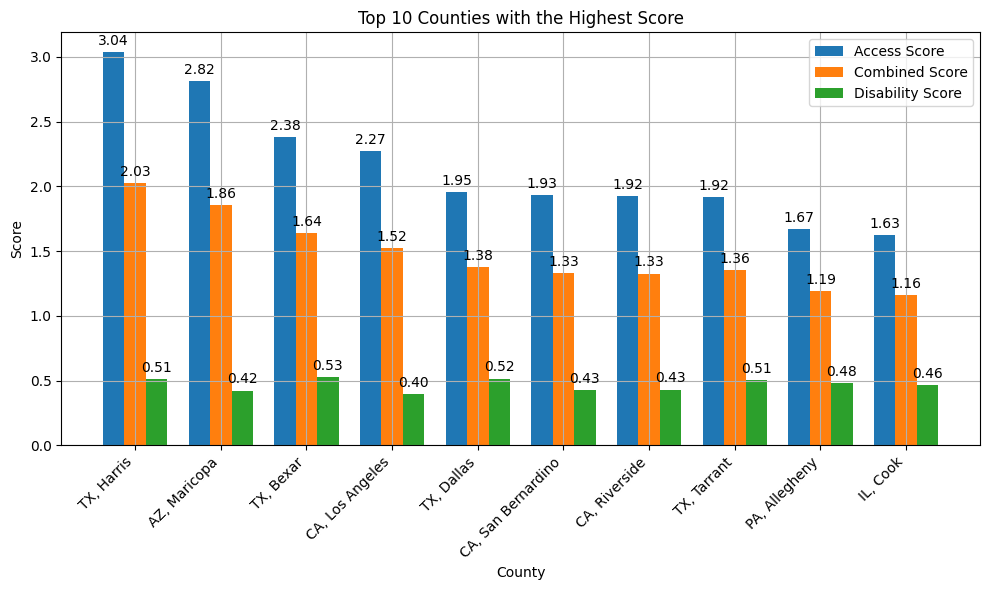

In [365]:
labels = (filtered_merged_data["State"] + ", " + filtered_merged_data["County"])[:10]
access_scores = filtered_merged_data["access_score"][:10]
disability_scores = filtered_merged_data["disability_score"][:10]
combined_scores = filtered_merged_data["combined_score"][:10]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, access_scores, width, label='Access Score')
bars3 = ax.bar(x, combined_scores, width, label='Combined Score')
bars2 = ax.bar(x + width, disability_scores, width, label='Disability Score')

ax.set_ylabel('Score')
ax.set_title('Top 10 Counties with the Highest Score')
ax.set_xticks(x)
ax.set_xlabel("County")
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

for bars in [bars1, bars3, bars2]:
    ax.bar_label(bars, fmt='%.2f', padding=3)

ax.grid(True)

plt.tight_layout()
plt.show()

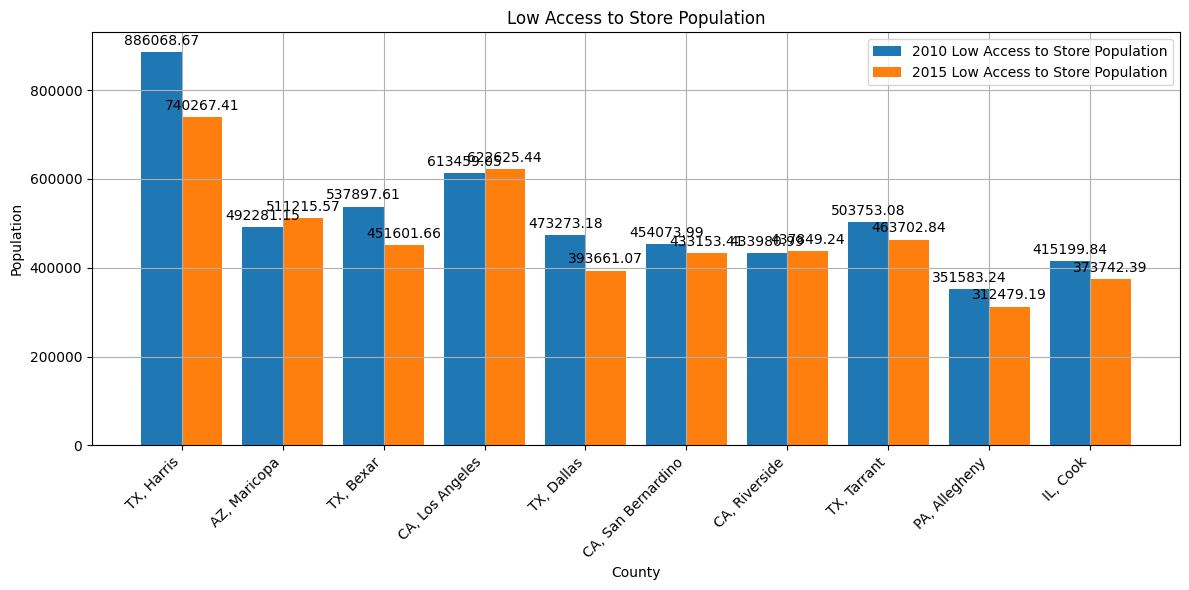

In [366]:
## Plot population of those counties

access["FIPS"] = access["FIPS"].astype(str)
target_counties = [str(fips) for fips in target_counties]
pop_data = access[access["FIPS"].isin(target_counties)].copy()
pop_data = pop_data.set_index("FIPS").loc[target_counties].reset_index()

fips = pop_data["FIPS"]
pop_15 = pop_data["LACCESS_POP15"]
pop_10 = pop_data["LACCESS_POP10"]

x = np.arange(len(target_counties))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, pop_10, width, label='2010 Low Access to Store Population')
bars2 = ax.bar(x + width/2, pop_15, width, label='2015 Low Access to Store Population')

ax.set_ylabel('Population')
ax.set_title('Low Access to Store Population')
ax.set_xticks(x)
ax.set_xlabel("County")
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

for bars in [bars1, bars2]:
    ax.bar_label(bars, fmt='%.2f', padding=3)

ax.grid(True)

plt.tight_layout()
plt.show()

---

## TX Harris County Breakdown

In [367]:
harris_access = access[access["FIPS"] == "48201"]
harris_disability = aggr_cities[aggr_cities["FIPS"] == "48201"]
prev_cols = [col for col in harris_disability.columns if "CrudePrev" in col]

print(harris_access.T)
print(harris_disability[prev_cols].T)

index                               2623
FIPS                               48201
State                                 TX
County                            Harris
LACCESS_POP10              886068.668386
LACCESS_POP15              740267.412661
PCH_LACCESS_POP_10_15         -16.454848
PCT_LACCESS_POP10              21.651253
PCT_LACCESS_POP15              18.088572
LACCESS_LOWI10             292541.789025
LACCESS_LOWI15             259479.516033
PCH_LACCESS_LOWI_10_15        -11.301727
PCT_LACCESS_LOWI10              7.148313
PCT_LACCESS_LOWI15               6.34043
LACCESS_HHNV10              13907.306475
LACCESS_HHNV15              12877.845972
PCH_LACCESS_HHNV_10_15           -7.4023
PCT_LACCESS_HHNV10              0.969046
PCT_LACCESS_HHNV15              0.897314
LACCESS_SNAP15              29461.297953
PCT_LACCESS_SNAP15               2.05283
LACCESS_CHILD10            260308.794094
LACCESS_CHILD15            219002.492912
LACCESS_CHILD_10_15           -15.868193
PCT_LACCESS_CHIL

In [368]:
def plot_pie_with_legend(
    values,
    labels,
    title="Pie Chart",
    figsize=(8, 6),
    show_weights=True,
    show_percent=True,
    donut=True,
    colors=None
):
    values = np.array(values)
    total = np.sum(values)

    def make_label(i, pct):
        parts = []
        if show_percent:
            parts.append(f"{pct:.1f}%")
        if show_weights:
            parts.append(f"{int(np.round(values[i]))}")
        return f" ({pct:.1f}%)" if show_percent else ""

    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(aspect="equal"))

    wedges, texts, autotexts = ax.pie(
        values,
        labels=None,
        startangle=90,
        autopct=lambda pct: '',
        wedgeprops=dict(width=0.4 if donut else 1.0),
        colors=colors
    )

    legend_labels = [
        f"{label}{make_label(i, 100 * v / total)}"
        for i, (label, v) in enumerate(zip(labels, values))
    ]

    ax.legend(
        wedges,
        legend_labels,
        title="Categories",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=9
    )

    ax.set_title(title)
    plt.tight_layout()
    plt.show()

### Low Access Racial Profiles

In [369]:
race_pct_col = ["PCT_LACCESS_WHITE15", "PCT_LACCESS_BLACK15", "PCT_LACCESS_HISP15", "PCT_LACCESS_NHASIAN15", "PCT_LACCESS_NHNA15", "PCT_LACCESS_NHPI15", "PCT_LACCESS_MULTIR15"]
race_labels = ["White", "Black", "Hispanic", "Asian", "American Indian & Alaska Native", "Hawaiian & Pacific Islander", "Multiracial"]

harris_access_race = harris_access[race_pct_col].iloc[0]

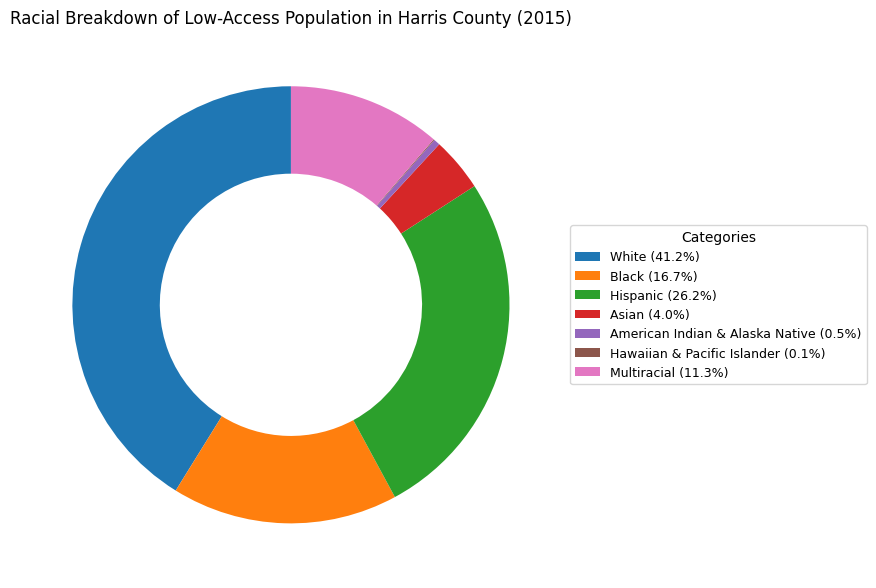

In [370]:
## Plot pie chart
plot_pie_with_legend(harris_access_race, race_labels, title="Racial Breakdown of Low-Access Population in Harris County (2015)")

### Low Access - Age Group

In [371]:
age_labels = ["Children", "Senior", "Other"]
age_cols = ["PCT_LACCESS_CHILD15", "PCT_LACCESS_SENIORS15"]

harris_access_age = harris_access[age_cols].iloc[0]
harris_access_age["OTHER"] = 100 - sum(harris_access_age)
harris_access_age

PCT_LACCESS_CHILD15       5.351367
PCT_LACCESS_SENIORS15     1.421234
OTHER                    93.227399
Name: 2623, dtype: float64

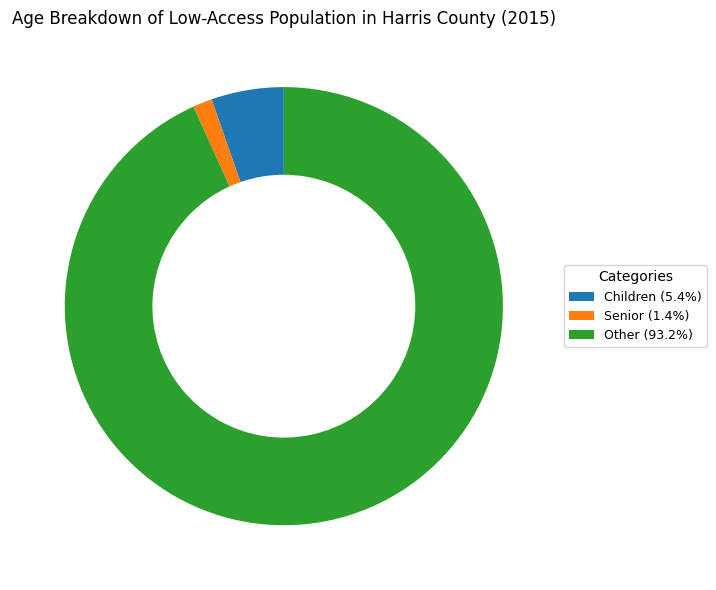

In [372]:
## Plot pie chart
plot_pie_with_legend(harris_access_age, age_labels, title="Age Breakdown of Low-Access Population in Harris County (2015)")

In [373]:
## Checking if the population of children is the highest
print("Top 5 Counties with highest children populations in 2015:")
print(access.sort_values(by="LACCESS_CHILD15", ascending=False).reset_index()[:5][["County", "State"]])
print("Top 5 Counties with highest children ratio in 2015:")
print(access.sort_values(by="PCT_LACCESS_CHILD15", ascending=False).reset_index()[:5][["County", "State"]])

Top 5 Counties with highest children populations in 2015:
           County State
0          Harris    TX
1     Los Angeles    CA
2         Tarrant    TX
3        Maricopa    AZ
4  San Bernardino    CA
Top 5 Counties with highest children ratio in 2015:
     County State
0   Buffalo    SD
1    Oldham    TX
2   Bennett    SD
3  Mellette    SD
4   Lincoln    ID


__Percentage of children within low access to store population is not the highest but the population count is the highest.__

In [374]:
## Checking if the population of senior is the highest
print("Top 5 Counties with highest senior populations in 2015:")
print(access.sort_values(by="LACCESS_SENIORS15", ascending=False).reset_index()[:5][["County", "State"]])
print("Top 5 Counties with highest senior ratio in 2015:")
print(access.sort_values(by="PCT_LACCESS_SENIORS15", ascending=False).reset_index()[:5][["County", "State"]])
# access.sort_values(by="LACCESS_SENIORS15", ascending=False).reset_index()[["County", "State", "FIPS", "LACCESS_SENIORS15", "PCT_LACCESS_SENIORS15"]]

Top 5 Counties with highest senior populations in 2015:
        County State
0     Maricopa    AZ
1  Los Angeles    CA
2        Ocean    NJ
3       Harris    TX
4    Riverside    CA
Top 5 Counties with highest senior ratio in 2015:
    County State
0  Wheeler    OR
1  Harding    NM
2   Catron    NM
3   Nelson    ND
4   Garden    NE


__Population of seniors at Harris, TX is among the top 5 while the percentage is not.__

### Low Access - Population & Households Columns

In [375]:
pct_cols = ["PCT_LACCESS_LOWI15", "PCT_LACCESS_HHNV15", "PCT_LACCESS_SNAP15"]

harris_access_pct = harris_access[pct_cols]
harris_access_pct

,PCT_LACCESS_LOWI15,PCT_LACCESS_HHNV15,PCT_LACCESS_SNAP15
index,,,
2623,6.34043,0.897314,2.05283


#### Comparing population of vulnerable groups

In [376]:
pop_cols = ["County", "State", "FIPS", "LACCESS_LOWI15", "LACCESS_HHNV15", "LACCESS_SNAP15"]

access_pop = access[pop_cols]
access_pop

,County,State,FIPS,LACCESS_LOWI15,LACCESS_HHNV15,LACCESS_SNAP15
index,,,,,,
0,Autauga,AL,1001,6543.676824,677.672769,931.935186
1,Baldwin,AL,1003,9886.831137,1394.162766,950.535290
2,Barbour,AL,1005,2948.790251,425.144927,422.569040
3,Bibb,AL,1007,596.162829,224.388125,53.818772
4,Blount,AL,1009,1650.959482,719.931444,175.370338
...,...,...,...,...,...,...
3138,Sweetwater,WY,56037,4750.905615,359.608360,352.866113
3139,Teton,WY,56039,1577.771012,48.474161,60.192270
3140,Uinta,WY,56041,2054.179828,211.630840,158.918171


In [377]:
print("Top 5 Counties with highest population of low income & low access to store groups:")
print(access_pop.sort_values(by="LACCESS_LOWI15", ascending=False)[:5][["County", "State"]])
print("Top 5 Counties with highest counts of household with no car & low access to store groups:")
print(access_pop.sort_values(by="LACCESS_HHNV15", ascending=False)[:5][["County", "State"]])
print("Top 5 Counties with highest counts of SNAP household with low access to store groups:")
print(access_pop.sort_values(by="LACCESS_SNAP15", ascending=False)[:5][["County", "State"]])

Top 5 Counties with highest population of low income & low access to store groups:
         County State
index                
2623     Harris    TX
2537      Bexar    TX
103    Maricopa    AZ
2579     Dallas    TX
2630    Hidalgo    TX
Top 5 Counties with highest counts of household with no car & low access to store groups:
          County State
index                 
103     Maricopa    AZ
2537       Bexar    TX
2623      Harris    TX
2245   Allegheny    PA
446       Fulton    GA
Top 5 Counties with highest counts of SNAP household with low access to store groups:
        County State
index               
2623    Harris    TX
2630   Hidalgo    TX
2537     Bexar    TX
2579    Dallas    TX
2506    Shelby    TN


Harris TX exhibits low percentages for vulnerable groups but the ranked population counts of those vulnerable groups (low income, no transport, SNAP) are still mostly the highest out of all counties.

### Disability trend

Plotting the top 10 disabilities with highest crude prevalences

In [378]:
## Only keep the variables (high to medium) related to food access
disability_vars = ['OBESITY_CrudePrev', 'DIABETES_CrudePrev', 'HIGHCHOL_CrudePrev', 'BPHIGH_CrudePrev', 'PHLTH_CrudePrev', 'MHLTH_CrudePrev', 'KIDNEY_CrudePrev', 'COPD_CrudePrev', 'CHD_CrudePrev', 'CASTHMA_CrudePrev', 'CANCER_CrudePrev', 'ARTHRITIS_CrudePrev']

harris_disability = aggr_cities[aggr_cities["FIPS"] == "48201"][["FIPS", "Population2010"]+ disability_vars]
harris_disability

,FIPS,Population2010,OBESITY_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,BPHIGH_CrudePrev,PHLTH_CrudePrev,MHLTH_CrudePrev,KIDNEY_CrudePrev,COPD_CrudePrev,CHD_CrudePrev,CASTHMA_CrudePrev,CANCER_CrudePrev,ARTHRITIS_CrudePrev
225,48201,2284224,34.404962,12.132409,34.03391,30.815923,13.111466,14.111186,3.141521,5.506828,5.492571,8.284426,4.861829,18.61691


In [379]:
## Filter out columns that presents prevalence beyond 25%
data_only = harris_disability.drop(columns=["FIPS", "Population2010"])

filtered_cols = data_only.loc[:, data_only.iloc[0] > 25].columns
filtered_harris = harris_disability[["FIPS", "Population2010"] + filtered_cols.tolist()]

filtered_harris

,FIPS,Population2010,OBESITY_CrudePrev,HIGHCHOL_CrudePrev,BPHIGH_CrudePrev
225,48201,2284224,34.404962,34.03391,30.815923


Over 1/4 of the population county in Harris, TX present high cholesterol, obesity, and high blood pressure medical conditions.

In [380]:
filtered_harris["Obesity_population"] = filtered_harris["Population2010"] * filtered_harris["OBESITY_CrudePrev"]
filtered_harris["HighChol_population"] = filtered_harris["Population2010"] * filtered_harris["HIGHCHOL_CrudePrev"]
filtered_harris["HighBP_population"] = filtered_harris["Population2010"] * filtered_harris["BPHIGH_CrudePrev"]

filtered_harris

/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_21334/541398334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_harris["Obesity_population"] = filtered_harris["Population2010"] * filtered_harris["OBESITY_CrudePrev"]
/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_21334/541398334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_harris["HighChol_population"] = filtered_harris["Population2010"] * filtered_harris["HIGHCHOL_CrudePrev"]
/var/folders/j9/4hvlltj95999sl

,FIPS,Population2010,OBESITY_CrudePrev,HIGHCHOL_CrudePrev,BPHIGH_CrudePrev,Obesity_population,HighChol_population,HighBP_population
225,48201,2284224,34.404962,34.03391,30.815923,78588640.4,77741073.9,70390470.1


---

## State Analysis (For Growth Opportunity)

In [381]:
access

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
index,,,,,,,,,,,,,,,,,,,,,
0,1001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,6543.676824,...,471.136164,0.863345,86.767975,0.159000,61.169869,0.112092,8.817961,0.016159,482.848633,0.884808
1,1003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,...,1377.874834,0.755973,212.946378,0.116833,181.649648,0.099662,14.819634,0.008131,1127.696098,0.618712
2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,...,509.377525,1.855183,17.096410,0.062266,39.960527,0.145539,8.082376,0.029436,462.382655,1.684025
3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,...,8.596762,0.037516,1.994318,0.008703,2.513097,0.010967,0.000000,0.000000,5.259244,0.022951
4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,...,497.489891,0.867886,8.428994,0.014705,28.938242,0.050484,1.062851,0.001854,202.914187,0.353990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,13391.715505,18934.737809,41.391428,30.570505,43.224074,2414.618816,4750.905615,...,2661.350520,6.075311,114.722086,0.261887,189.621441,0.432866,27.720443,0.063280,1605.391465,3.664775
3139,56039,WY,Teton,6212.423697,6212.390430,-0.000535,29.174527,29.174370,1059.463554,1577.771012,...,736.174507,3.457192,53.489780,0.251196,32.482255,0.152542,8.468847,0.039771,460.434464,2.162273
3140,56041,WY,Uinta,4270.147119,4686.017653,9.739021,20.220414,22.189685,1518.415783,2054.179828,...,535.616715,2.536304,13.831709,0.065497,40.339658,0.191020,6.586104,0.031187,350.320469,1.658871


In [382]:
counties = gpd.read_file("cb_2021_us_county_20m.shp")
counties["FIPS"] = counties["STATEFP"] + counties["COUNTYFP"]

access["FIPS"] = access["FIPS"].astype(str).str.zfill(5)
counties["FIPS"] = counties["FIPS"].astype(str)

merged = counties.merge(access, how="inner", on="FIPS")
filtered = merged[pd.to_numeric(merged["LACCESS_POP15"], errors="coerce").notnull()]
filtered

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,13,239,00350547,0500000US13239,13239,Quitman,Quitman County,GA,Georgia,06,...,13.368525,0.531975,0.006832,0.000272,1.083397,0.043112,0.000000,0.000000,8.100073,0.322327
1,18,111,00450376,0500000US18111,18111,Newton,Newton County,IN,Indiana,06,...,94.628109,0.664337,5.683373,0.039900,10.753535,0.075495,0.000000,0.000000,45.644303,0.320446
2,19,053,00465215,0500000US19053,19053,Decatur,Decatur County,IA,Iowa,06,...,8.000000,0.094596,1.839943,0.021756,1.997112,0.023615,0.000000,0.000000,11.000000,0.130070
3,24,013,01696228,0500000US24013,24013,Carroll,Carroll County,MD,Maryland,06,...,805.212813,0.481777,658.716807,0.394125,65.973966,0.039474,13.693201,0.008193,728.636570,0.435960
4,29,155,00758532,0500000US29155,29155,Pemiscot,Pemiscot County,MO,Missouri,06,...,21.978197,0.120126,1.808595,0.009885,2.963621,0.016198,0.000000,0.000000,26.668778,0.145763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,41,063,01155135,0500000US41063,41063,Wallowa,Wallowa County,OR,Oregon,06,...,47.152225,0.672834,0.898396,0.012820,4.322483,0.061679,1.000000,0.014269,51.809471,0.739290
3135,13,163,00345714,0500000US13163,13163,Jefferson,Jefferson County,GA,Georgia,06,...,5.485073,0.032399,7.918527,0.046772,0.000000,0.000000,0.000000,0.000000,1.782274,0.010527
3136,02,100,01419970,0500000US02100,02100,Haines,Haines Borough,AK,Alaska,04,...,13.425343,0.535301,4.035395,0.160901,25.098224,1.000727,0.000000,0.000000,43.919277,1.751167
3137,05,117,00069176,0500000US05117,05117,Prairie,Prairie County,AR,Arkansas,06,...,34.028163,0.390455,3.000000,0.034423,12.086779,0.138689,0.000000,0.000000,45.453032,0.521549


/Users/wylliamcheng/miniconda3/envs/data-analytics/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


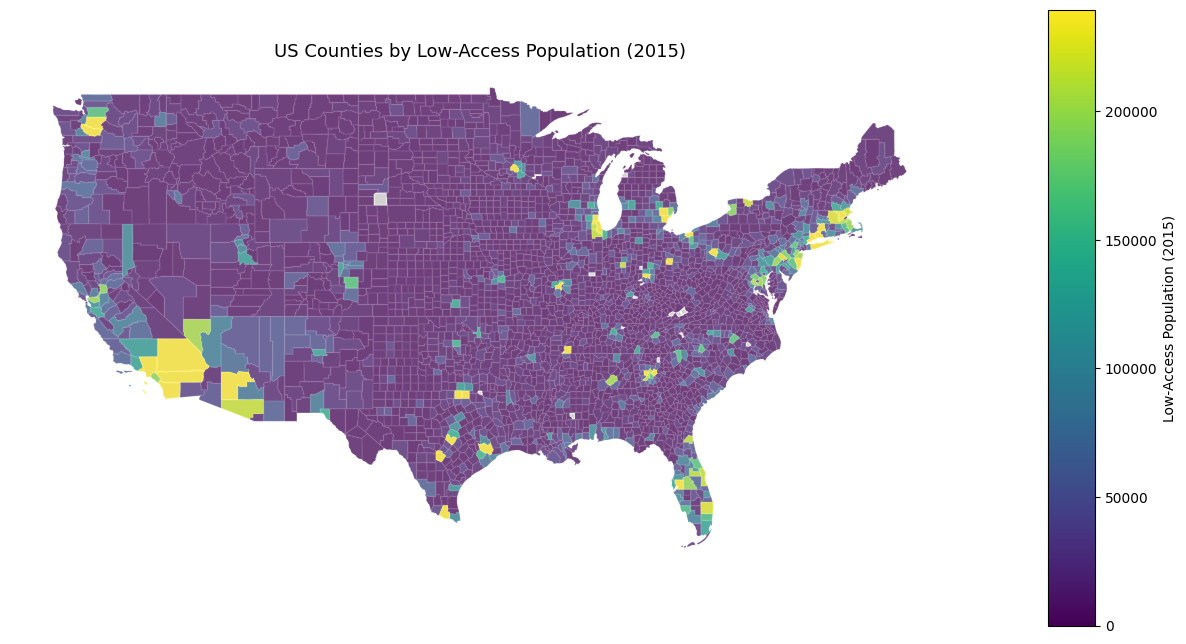

In [383]:
filtered = filtered.to_crs(counties.crs)
filtered = filtered[filtered["LACCESS_POP15"].notnull()]

counties_clean = counties.cx[-130:-65, 24:50]  
filtered_clean = filtered.cx[-130:-65, 24:50]

filtered_clean["size"] = np.sqrt(filtered_clean["LACCESS_POP15"]) / 5
vmax = np.percentile(filtered_clean["LACCESS_POP15"], 99)
norm = mpl.colors.Normalize(vmin=0, vmax=vmax)
cmap = plt.cm.viridis

fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[20, 1])  

ax = fig.add_subplot(gs[0])
cb_ax = fig.add_subplot(gs[1]) 

counties_clean.plot(ax=ax, color="lightgrey", edgecolor="white")

filtered_clean.plot(
    ax=ax,
    color=filtered_clean["LACCESS_POP15"].map(lambda x: cmap(norm(x))),
    markersize=filtered_clean["size"],
    alpha=0.7,
    marker='o'
)

sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, cax=cb_ax)
cbar.set_label("Low-Access Population (2015)")

ax.set_title("US Counties by Low-Access Population (2015)", fontsize=13)
ax.axis("off")
plt.show()

---

## Binning the Population with Low Access to Store

In [394]:
num_bins = 10
access_clone = access.copy()
access_clone = access_clone[access_clone["LACCESS_POP15"] > 100000] ## set a threshold for the highly populated area - easier for comparison
access_clone["pop_bin"] = pd.cut(access_clone["LACCESS_POP15"], bins=num_bins)

access_clone["binned_range"] = access_clone["pop_bin"].apply(lambda x: f"{int(x.left):,}–{int(x.right):,}")

access_clone

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15,pop_bin,binned_range
index,,,,,,,,,,,,,,,,,,,,,
36,01073,AL,Jefferson,209261.458662,205657.867797,-1.722052,31.780146,31.232876,75209.934064,80804.251855,...,1808.048713,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462,"(164040.418, 228065.639]","164,040–228,065"
48,01097,AL,Mobile,112773.596024,103768.643504,-7.984983,27.306484,25.126066,43729.818048,42397.450221,...,1982.744933,0.480093,565.076549,0.136825,56.559069,0.013695,2216.348385,0.536656,"(99374.944, 164040.418]","99,374–164,040"
103,04013,AZ,Maricopa,492281.154146,511215.572448,3.846261,12.896674,13.392714,139988.257834,167933.017109,...,14730.523043,0.385907,10079.040365,0.264049,724.064859,0.018969,73145.345007,1.916246,"(484166.526, 548191.748]","484,166–548,191"
106,04019,AZ,Pima,232208.175240,218481.730090,-5.911267,23.688355,22.288073,71177.537687,75295.149719,...,4468.907193,0.455889,14426.028628,1.471649,243.922646,0.024883,29659.495645,3.025667,"(164040.418, 228065.639]","164,040–228,065"
170,05119,AR,Pulaski,116978.078343,101839.261930,-12.941584,30.562688,26.607392,38731.913705,39910.499495,...,1460.646999,0.381621,449.409636,0.117417,75.530733,0.019734,5210.705266,1.361393,"(99374.944, 164040.418]","99,374–164,040"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,51059,VA,Fairfax,205514.694564,205554.370082,0.019305,18.998776,19.002443,13853.257275,19230.214676,...,28860.735385,2.668026,524.714146,0.048507,162.324720,0.015006,13086.466323,1.209776,"(164040.418, 228065.639]","164,040–228,065"
2970,53033,WA,King,333424.097165,317784.493537,-4.690604,17.264687,16.454869,50410.727683,53618.079664,...,39073.037042,2.023200,2427.871958,0.125715,1914.046483,0.099109,22054.817658,1.141998,"(292090.861, 356116.083]","292,090–356,116"
2980,53053,WA,Pierce,266739.917022,260286.776967,-2.419263,33.542698,32.731212,64056.450215,66188.572172,...,13063.385727,1.642728,3293.824093,0.414200,3573.391363,0.449356,24347.547916,3.061718,"(228065.639, 292090.861]","228,065–292,090"


/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_21334/423022526.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = access_clone.pivot_table(


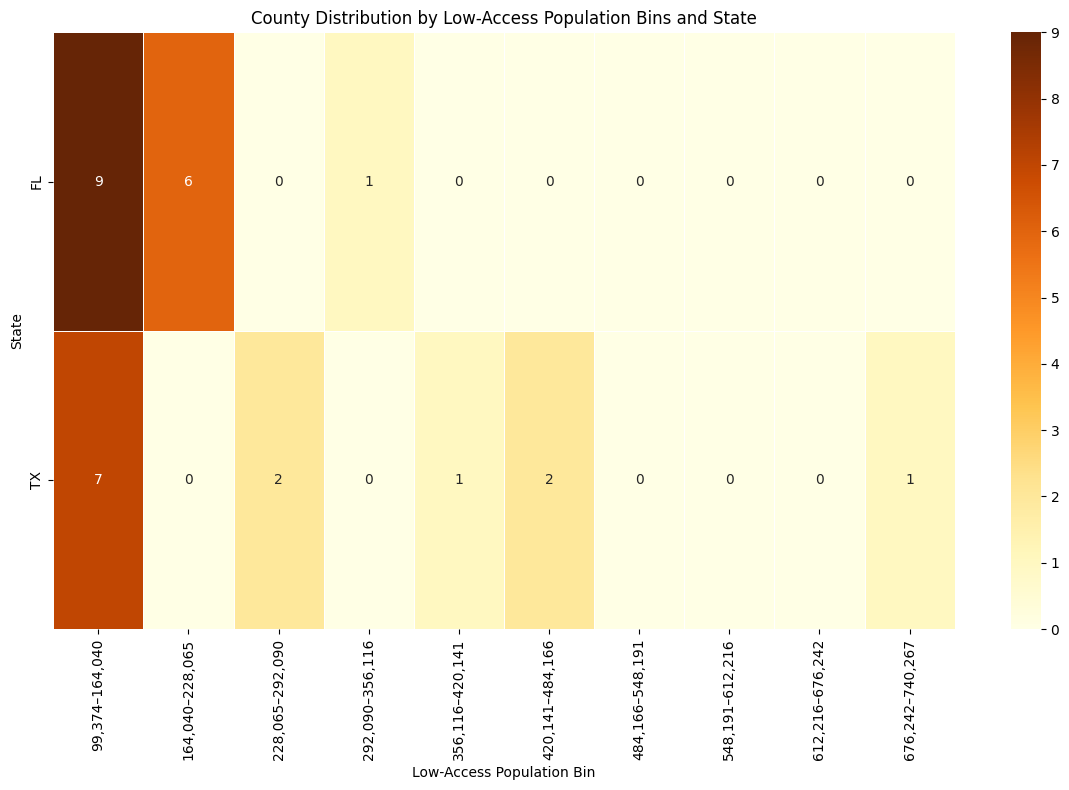

In [395]:
heatmap_data = access_clone.pivot_table(
    index="State",
    columns="binned_range",
    values="LACCESS_POP15",
    aggfunc="count",
    fill_value=0
)

heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(12, 8))
filtered = heatmap_data[heatmap_data.max(axis=1) > 5]
sns.heatmap(filtered, cmap="YlOrBr", annot=True, fmt="d", linewidths=0.5)
plt.title("County Distribution by Low-Access Population Bins and State")
plt.xlabel("Low-Access Population Bin")
plt.ylabel("State")
plt.tight_layout()
plt.show()

In [386]:
low_access_store_pop = access.groupby(by=["State"]).sum().sort_values(by="LACCESS_POP15", ascending=False)
low_access_store_pop["PCT_LACCESS_POP_10_15"] = (low_access_store_pop["LACCESS_POP15"] - low_access_store_pop["LACCESS_POP10"]) / low_access_store_pop["LACCESS_POP10"]
low_access_store_pop[["LACCESS_POP15", "LACCESS_POP10", "PCT_LACCESS_POP_10_15"]]

,LACCESS_POP15,LACCESS_POP10,PCT_LACCESS_POP_10_15
State,,,
TX,5.726930e+06,6.410726e+06,-0.106664
CA,4.323350e+06,4.594848e+06,-0.059088
FL,3.986500e+06,4.194767e+06,-0.049649
OH,2.636742e+06,2.598512e+06,0.014712
PA,2.526792e+06,2.647804e+06,-0.045703
GA,2.382761e+06,2.449439e+06,-0.027222
IL,2.295067e+06,2.430237e+06,-0.055620
NY,2.157895e+06,2.434773e+06,-0.113718
MI,2.083846e+06,2.107829e+06,-0.011378


In [387]:
access[(access["County"] == "Harris") & (access["State"] == "TX")][["LACCESS_SENIORS15", "PCH_LACCESS_SENIORS_10_15"]]

,LACCESS_SENIORS15,PCH_LACCESS_SENIORS_10_15
index,,
2623,58163.408469,-13.628539


In [388]:
access[(access["County"] == "Harris") & (access["State"] == "TX")][["LACCESS_CHILD15", "LACCESS_CHILD_10_15"]]

,LACCESS_CHILD15,LACCESS_CHILD_10_15
index,,
2623,219002.492912,-15.868193


In [389]:
access[(access["County"] == "Harris") & (access["State"] == "TX")][["LACCESS_LOWI15", "PCH_LACCESS_LOWI_10_15"]]

,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15
index,,
2623,259479.516033,-11.301727


In [390]:
access.columns

Index(['FIPS', 'State', 'County', 'LACCESS_POP10', 'LACCESS_POP15',
       'PCH_LACCESS_POP_10_15', 'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15',
       'LACCESS_LOWI10', 'LACCESS_LOWI15', 'PCH_LACCESS_LOWI_10_15',
       'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'LACCESS_HHNV10',
       'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV10',
       'PCT_LACCESS_HHNV15', 'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15',
       'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15',
       'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15', 'LACCESS_SENIORS10',
       'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15',
       'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15', 'LACCESS_WHITE15',
       'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15',
       'LACCESS_HISP15', 'PCT_LACCESS_HISP15', 'LACCESS_NHASIAN15',
       'PCT_LACCESS_NHASIAN15', 'LACCESS_NHNA15', 'PCT_LACCESS_NHNA15',
       'LACCESS_NHPI15', 'PCT_LACCESS_NHPI15', 'LACCESS_MULTIR15',
       'PCT_LACCESS_MULT

In [391]:
access[(access["County"] == "Harris") & (access["State"] == "TX")][["LACCESS_HHNV15", "PCH_LACCESS_HHNV_10_15"]]

,LACCESS_HHNV15,PCH_LACCESS_HHNV_10_15
index,,
2623,12877.845972,-7.4023


In [392]:
access[(access["County"] == "Harris") & (access["State"] == "TX")][["LACCESS_SNAP15"]]

,LACCESS_SNAP15
index,
2623,29461.297953


In [393]:
access[(access["County"] == "Harris") & (access["State"] == "TX")][["LACCESS_POP15", "PCH_LACCESS_POP_10_15"]]

,LACCESS_POP15,PCH_LACCESS_POP_10_15
index,,
2623,740267.412661,-16.454848
